In [2]:
# data set: https://www.kaggle.com/nasa/kepler-exoplanet-search-results

In [3]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# set seed for reproducibility 
np.random.seed(0)

In [5]:
data = pd.read_csv("exoplanet_data.csv")

In [ ]:
data.head()

In [ ]:
# find number of missing values
missing_values_count = data.isnull().sum()
missing_values_count.value_counts()

In [ ]:
# list column names
data.columns

In [6]:
# choose which features to include in model
X = data[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

In [7]:
# set predictor variable
y = data["koi_disposition"]

In [8]:
# covert y from categorical to numerical labels using label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [ ]:
# reshape y from 1D to 2D array
# encoded_y = encoded_y.reshape(-1,1)

In [9]:
# create train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [10]:
# scale data with minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit(X_train)
# y_scaled = scaler.fit(y_train)

X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)
# y_train_scaled = y_scaled.transform(y_train)
# y_test_scaled = y_scaled.transform(y_test)

### Linear Regression

In [11]:
# test a linear regression model on scaled data
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
print(f"train data score: {linear_model.score(X_train_scaled, y_train)}")
print(f"train data score: {linear_model.score(X_test_scaled, y_test)}")

train data score: 0.6610282017849459
train data score: 0.6387189573707032


### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class="multinomial", solver="sag", max_iter=4000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=4000, multi_class='multinomial', solver='sag')

In [53]:
print(f"train data score: {log_model.score(X_train_scaled, y_train)}")
print(f"test data score: {log_model.score(X_test_scaled, y_test)}")

train data score: 0.8483692542437535
test data score: 0.8443935926773455


### KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"train score: {train_score:.3f}, test score: {test_score:3f}, k = {k}")
    

train score: 1.000, test score: 0.790046, k = 1
train score: 0.897, test score: 0.811213, k = 3
train score: 0.878, test score: 0.819794, k = 5
train score: 0.866, test score: 0.823227, k = 7
train score: 0.856, test score: 0.827803, k = 9
train score: 0.848, test score: 0.827803, k = 11
train score: 0.849, test score: 0.822082, k = 13
train score: 0.841, test score: 0.824371, k = 15
train score: 0.838, test score: 0.827231, k = 17
train score: 0.836, test score: 0.824371, k = 19


Text(0, 0.5, 'accuracy scores')

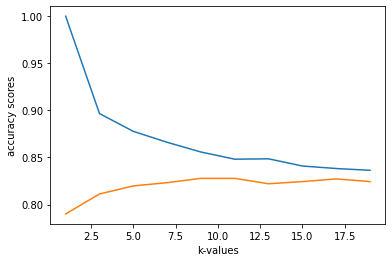

In [16]:
plt.plot(range(1,20,2), train_scores)
plt.plot(range(1,20,2), test_scores)
plt.xlabel("k-values")
plt.ylabel("accuracy scores")

In [17]:
# k = 9 is the best choice for this data

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print(f"test data score: {knn.score(X_test_scaled, y_test)}")

test data score: 0.8278032036613272


### Perform gridsearch on most accurate model, the Logistic Regression model

In [70]:
from sklearn.model_selection import GridSearchCV

grid = {'C': range(1,20)}
grid = GridSearchCV(log_model, grid, n_jobs=-1)

In [71]:
grid.fit(X_train, y_train)

c:\users\flurp\anaconda3\envs\pythonadv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(estimator=LogisticRegression(C=15, max_iter=1000,
                                          multi_class='multinomial',
                                          solver='sag'),
             n_jobs=-1, param_grid={'C': range(1, 20)})

In [78]:
grid.best_score_

0.5054359295293955

In [ ]:
# Grid search did not yield a better score than the initial logistic regression model.

# however, I was able to tweak C from values 1-20 and found that C=15 yields a score of 0.87, seen below:

In [76]:
log_modelv2 = LogisticRegression(multi_class="multinomial", solver="sag", max_iter=4000, C=15)
log_modelv2.fit(X_train_scaled, y_train)

LogisticRegression(C=15, max_iter=4000, multi_class='multinomial', solver='sag')

In [77]:
print(f"train data score: {log_modelv2.score(X_train_scaled, y_train)}")
print(f"test data score: {log_modelv2.score(X_test_scaled, y_test)}")

train data score: 0.8785046728971962
test data score: 0.8729977116704806
